In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:


df = pd.read_csv('/content/drive/MyDrive/twitter_training/twitter_training.csv', header=None)

In [5]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.columns = ['Tweet ID', 'Category', 'Sentiment', 'Tweet Text']

In [7]:
df.head()

,Tweet ID,Category,Sentiment,Tweet Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import csv
import re

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
#Function to clean text
def clean_text(text):
  if not isinstance(text, str):
    return ''
  #Remove URLs
  text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  #Remove special characters
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  #Remove numbers
  text = re.sub(r'\d+', '', text)
  #Remove extra whitespaces
  text = re.sub(r'\s+', ' ', text).strip()
  text = text.lower()
   #tokenize the split
  words = word_tokenize(text)
  #Remove Stopwords and lammetize the text
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  #Join the clean words back into the sentence
  clean_text = ' '.join(words)
  return clean_text

df['Cleaned_text'] = df['Tweet Text'].apply(clean_text)

In [13]:
df.head()

,Tweet ID,Category,Sentiment,Tweet Text,Cleaned_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder


In [14]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.4 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
def analyze_sentiment(text):
  score = analyzer.polarity_scores(text)
  if score['compound'] >= 0.05:
    return 'Positive'
  elif score['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'
df['Sentiment'] = df['Cleaned_text'].apply(analyze_sentiment)

In [18]:
df.head()

,Tweet ID,Category,Sentiment,Tweet Text,Cleaned_text
0,2401,Borderlands,Negative,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Negative,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Negative,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Negative,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Negative,im getting on borderlands 2 and i will murder ...,im getting borderland murder


In [19]:
output_df = df[['Tweet ID', 'Category', 'Sentiment', 'Cleaned_text']]
output_df.to_csv('Sentiment_analysis_output.csv', index=False,  quoting=csv.QUOTE_ALL)
print("Sentiment analysis output saved succesfully")

Sentiment analysis output saved succesfully


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

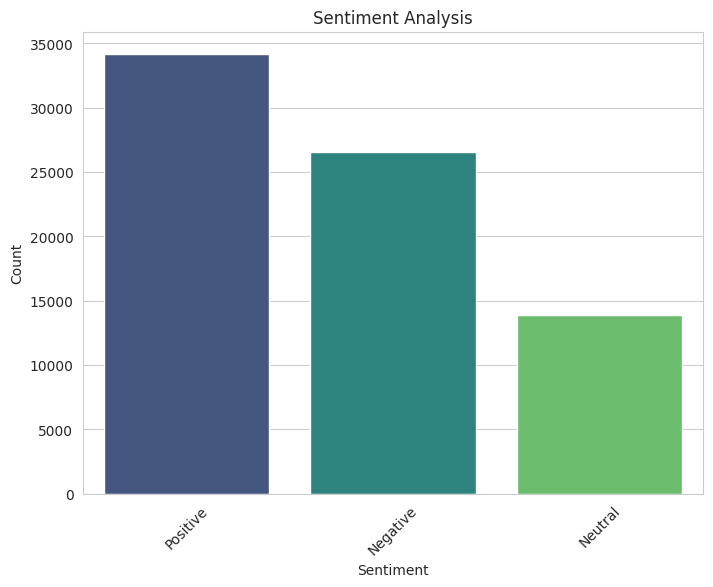

In [21]:
sns.set_style('whitegrid')
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis',hue=sentiment_counts.index)
plt.xticks(rotation=45)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [22]:
!pip install transformers torch

In [23]:
from transformers import pipeline

In [ ]:
from google.colab import files
files.download('Sentiment_analysis_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
sentiment_pipeline = pipeline("sentiment-analysis")
#Function to analyze sentiment using BERT
def bert_analyze_sentiment(text):
  result = sentiment_pipeline(text)
  return result[0]['label']
df['BERT_Sentiment'] = df['Cleaned_text'].apply(bert_analyze_sentiment)
output_df = df[['Tweet ID', 'Category', 'BERT_Sentiment', 'Cleaned_text']]
output_df.to_csv('BERT_Sentiment_analysis_output.csv', index=False,  quoting=csv.QUOTE_ALL)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [31]:
df.head()

,Tweet ID,Category,Sentiment,Tweet Text,Cleaned_text,BERT_Sentiment
0,2401,Borderlands,Negative,im getting on borderlands and i will murder yo...,im getting borderland murder,NEGATIVE
1,2401,Borderlands,Negative,I am coming to the borders and I will kill you...,coming border kill,NEGATIVE
2,2401,Borderlands,Negative,im getting on borderlands and i will kill you ...,im getting borderland kill,NEGATIVE
3,2401,Borderlands,Negative,im coming on borderlands and i will murder you...,im coming borderland murder,NEGATIVE
4,2401,Borderlands,Negative,im getting on borderlands 2 and i will murder ...,im getting borderland murder,NEGATIVE


In [27]:
from google.colab import files
files.download('BERT_Sentiment_analysis_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sentiment Distribution by Category
This visualizations shows the distributions of sentiments of each category

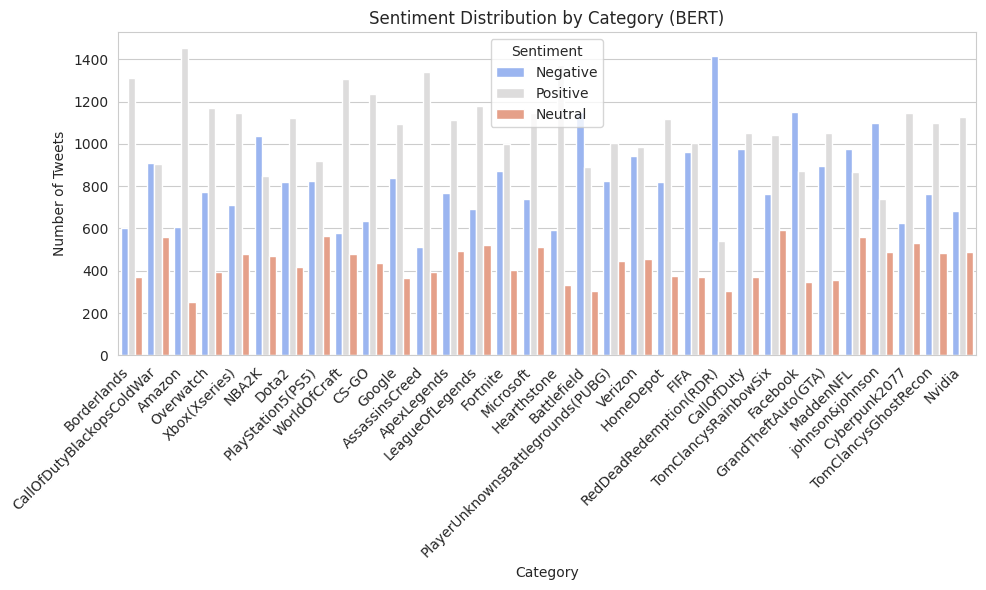

In [30]:
sns.set_style('whitegrid')
#Creating a countplot of sentiments by category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', hue='Sentiment', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Distribution by Category (BERT)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()












# 2. Overall Sentiment Distribution (Pie Chart)

(-1.0999960650442968,
 1.0999977053935173,
 -1.099996100505835,
 1.0999998143098018)

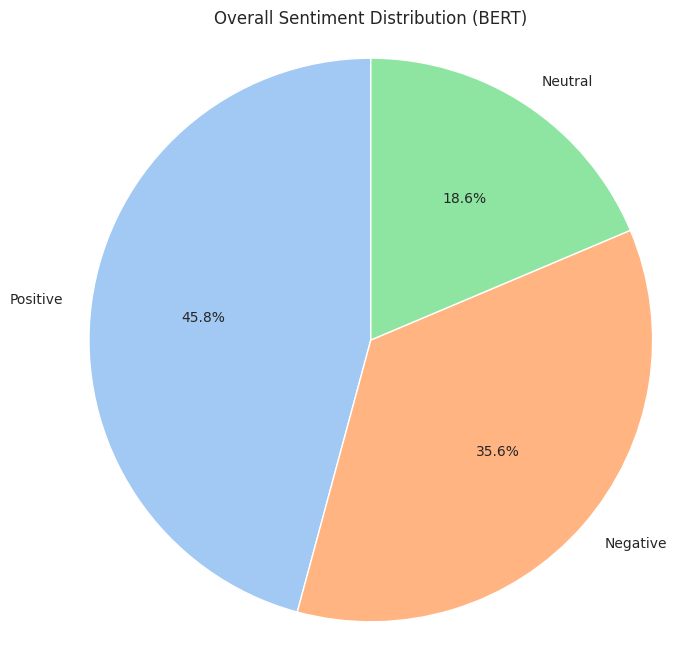

In [32]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Overall Sentiment Distribution (BERT)')
plt.axis('equal')